In [ ]:
# LSTM과 CNN의 조합을 이용한 영화 리뷰 분류 (Internet Movie Database, IMDB)
# 긍정 부정 binary classification 

In [1]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import Conv1D, MaxPooling1D
from keras.datasets import imdb
 
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
  
# seed 값 설정
seed = 0
np.random.seed(seed)
tf.random.set_seed(3)

In [2]:
# 학습셋과 테스트셋 지정하기
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=5000)

# 데이터 전처리
x_train = sequence.pad_sequences(x_train, maxlen=100)
x_test = sequence.pad_sequences(x_test, maxlen=100)

17465344/17464789 [==============================] - 2s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
C:\Users\asus\anaconda3\envs\django3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\asus\anaconda3\envs\django3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you mea

In [3]:
# 모델의 설정
model = Sequential()
model.add(Embedding(5000, 100))
model.add(Dropout(0.5))
model.add(Conv1D(64, 5, padding='valid', activation='relu',strides=1))
# strides = 1칸 씩 건너가면서 
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(55))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 100)         500000    
_________________________________________________________________
dropout (Dropout)            (None, None, 100)         0         
_________________________________________________________________
conv1d (Conv1D)              (None, None, 64)          32064     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, None, 64)          0         
_________________________________________________________________
lstm (LSTM)                  (None, 55)                26400     
_________________________________________________________________
dense (Dense)                (None, 1)                 56        
_________________________________________________________________
activation (Activation)      (None, 1)                 0

In [5]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [6]:
history = model.fit(x_train, y_train, batch_size=100, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
250/250 [==============================] - 11s 45ms/step - loss: 0.4485 - accuracy: 0.7739 - val_loss: 0.3674 - val_accuracy: 0.8379
Epoch 2/5
250/250 [==============================] - 11s 43ms/step - loss: 0.2960 - accuracy: 0.8755 - val_loss: 0.3336 - val_accuracy: 0.8558
Epoch 3/5
250/250 [==============================] - 11s 42ms/step - loss: 0.2537 - accuracy: 0.8943 - val_loss: 0.3247 - val_accuracy: 0.8595
Epoch 4/5
250/250 [==============================] - 11s 43ms/step - loss: 0.2161 - accuracy: 0.9154 - val_loss: 0.3278 - val_accuracy: 0.8554
Epoch 5/5
250/250 [==============================] - 11s 44ms/step - loss: 0.1800 - accuracy: 0.9332 - val_loss: 0.3491 - val_accuracy: 0.8542


In [7]:
print("\n Test Accuracy: %.4f" % (model.evaluate(x_test, y_test)[1]))

782/782 [==============================] - 4s 5ms/step - loss: 0.3491 - accuracy: 0.8542

 Test Accuracy: 0.8542


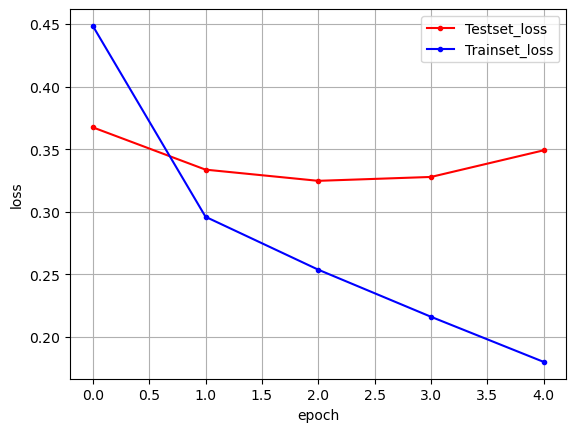

In [9]:
# 테스트셋의 오차
y_vloss = history.history['val_loss']
  
# 학습셋의 오차
y_loss = history.history['loss']
  
# 그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')
  
# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()